In [122]:
import numpy as np
import matplotlib.pyplot as plt
import pyPLUTO as pp
import pandas as pd 
import h5py
import seaborn as sns   
import os
import glob
import scipy.integrate as integrate
sns.set_style("ticks")

In [49]:
dir = os.getcwd()
print(dir)
wdir = dir+"/data/"
nlinf = pp.nlast_info(w_dir=wdir)

/Users/cairns/Desktop/PLUTOO/KPS
------------TIME INFORMATION--------------
nlast = 1
time  =100000.000000
dt    =0.651558
Nstep =125129
-------------------------------------------


In [8]:
# functions
def gamma(v):
    return 1/np.sqrt(1-v**2)

In [50]:
files=glob.glob(wdir+"data.*.dbl.h5")
len(files)

1001

In [85]:
# last timestep
# timestep=str(nlinf["nlast"])
# data = h5py.File(wdir + "data.000"+str(nlinf["nlast"])+".dbl.h5", "r")
# rho = pd.DataFrame(data["Timestep_"+str(nlinf["nlast"])+"/vars/rho"])
# v = pd.DataFrame(data["Timestep_"+str(nlinf["nlast"])+"/vars/vx1"])
# p = pd.DataFrame(data["Timestep_"+str(nlinf["nlast"])+"/vars/prs"])

# timestep = str(nlinf["time"]).split(".")[0]
timestep = 990
time = nlinf["time"]

data = h5py.File(wdir + "data.0"+str(timestep)+".dbl.h5", "r")
rho = pd.DataFrame(data["Timestep_"+str(timestep)+"/vars/rho"])
v = pd.DataFrame(data["Timestep_"+str(timestep)+"/vars/vx1"])
p = pd.DataFrame(data["Timestep_"+str(timestep)+"/vars/prs"])

coord=pd.DataFrame(data["cell_coords" ]["X"])


0.9999574258389342 108.37187196392154


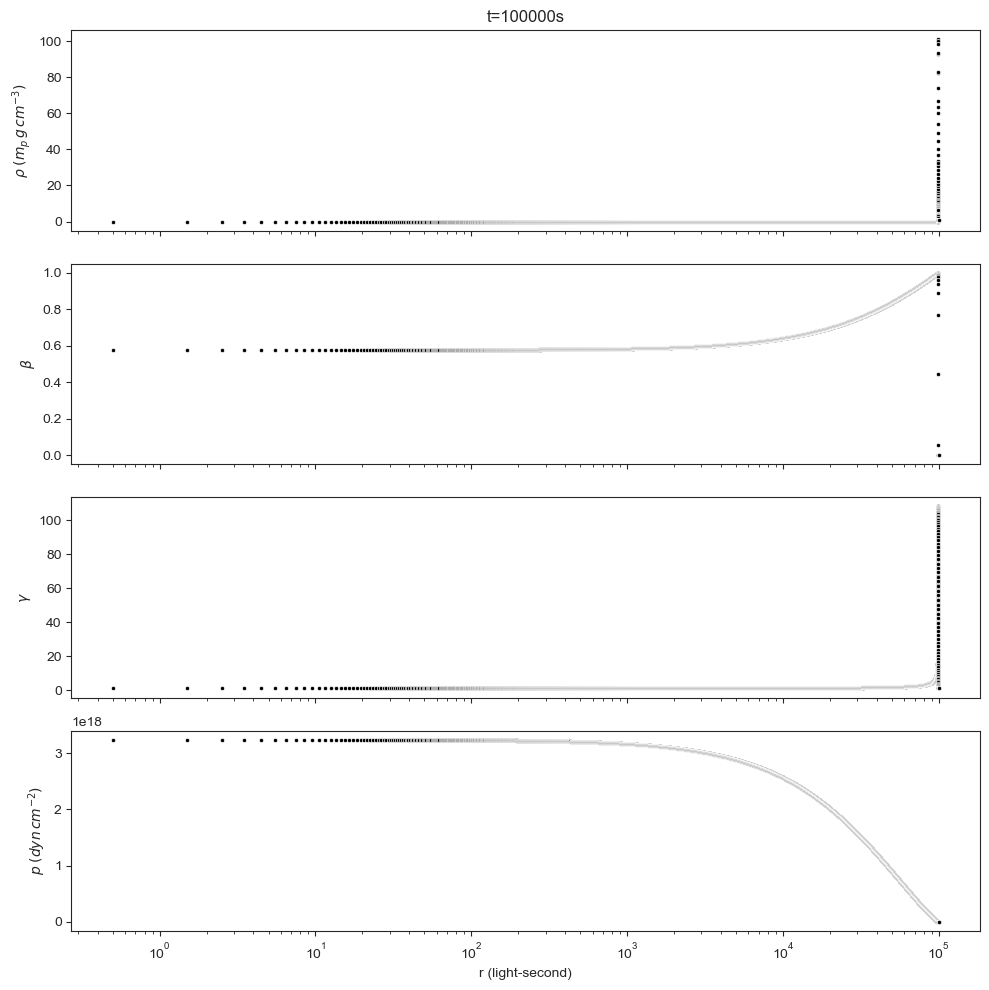

In [125]:
# plotting timestep

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(10,10), sharex=True,)
# plt.subplots_adjust(hspace = 0.3)

sns.scatterplot(x=coord[0], y=rho[0] , marker=".",color="black",ax=ax1)
ax1.set(xscale="log",xlabel="", ylabel=r"$\rho$"+r" $(m_p\, g\,cm^{-3})$", title=("t="+ str(nlinf["time"])[:-2]+"s"),)

sns.scatterplot(x=coord[0], y=v[0] , marker=".",color="black",ax=ax2)    
ax2.set(xscale="log", ylabel=r"$\beta$",xlabel="")
print(v[0].max(), gamma(v[0].max()))

sns.scatterplot(x=coord[0], y=gamma(v[0]) , marker=".",color="black",ax=ax3)
ax3.set(xscale="log", xlabel="", ylabel=r"$\gamma$")

sns.scatterplot(x=coord[0], y=p[0] , marker=".",color="black", ax=ax4)
ax4.set(xscale="log",xlabel="r (light-second)", ylabel=r"$p$ $(dyn \, cm^{-2})$")
plt.tight_layout()

plt.savefig("images/timestep_"+str(timestep)+".png")
data.close()

In [22]:
# Maximum Lorentz factor evolution

for file in sorted(glob.glob(wdir+"*.dbl.h5"), key=lambda file: int(file.split(".",)[1])):
# [:nlinf["nlast"]+1]: 

    data = h5py.File(file, "r")
    cells=pd.DataFrame(data["cell_coords"]["X"])
    time = list(data.keys())[0]
    print(time)

    rho = pd.DataFrame(data[time+"/vars/rho"])
    p = pd.DataFrame(data[time+"/vars/prs"])
    v = pd.DataFrame(data[time+"/vars/vx1"])

    print(max(v[0]), gamma(max(v[0])))
  
    plt.scatter(x=cells[0][v[0].idxmax()], y=gamma(max(v[0])) , marker=".", color="black")
    data.close()

Timestep_0
0.0 1.0
Timestep_1
0.9784904372901174 4.847493457674916
Timestep_2
0.9801883671855242 5.04878192588257
Timestep_3
0.9814041691075456 5.209615484271129
Timestep_4
0.982087990326745 5.307211282012813
Timestep_5
0.982542882377903 5.375296638492716
Timestep_6
0.9830901600340842 5.460834585163731
Timestep_7
0.9834613522971128 5.521259131838939
Timestep_8
0.9838154316143256 5.580830172150182
Timestep_9
0.984081702319697 5.626935189686578
Timestep_10
0.9842189134887919 5.651148986947534
Timestep_11
0.9845685191858352 5.7143014784828035
Timestep_12
0.984808257553865 5.758865379304745
Timestep_13
0.9850066911285262 5.796559105474194
Timestep_14
0.9853252628247369 5.858669505811797
Timestep_15
0.9854934921515046 5.89229290451932
Timestep_16
0.9858208699114241 5.9594361517970285
Timestep_17
0.9860246784578661 6.002425454932946
Timestep_18
0.9863269272625236 6.067944122744146
Timestep_19
0.986532827407841 6.113837817117177
Timestep_20
0.9868316710016446 6.182357695982281
Timestep_21
0.9

KeyboardInterrupt: 

In [ ]:
# Average Lorentz factor evolution
for file in glob.glob(wdir+"*.dbl.h5")[:nlinf["nlast"]+1]: 
    
    data = h5py.File(file, "r")
    cells=pd.DataFrame(data["cell_coords"]["X"])
    time = list(data.keys())[0]
    print(time)

    rhos = pd.DataFrame(data[time+"/vars/rho"])
    p = pd.DataFrame(data[time+"/vars/prs"])
    v = pd.DataFrame(data[time+"/vars/vx1"])
    
    print(max(v[0]), gamma(max(v[0])))

    m=gamma*rhos + (3+v**2)*p

    max_v = v[0].idxmax()
    print(max_v)

    gam_avg = (gamma[:max_v]*m[:max_v]*(cells[:max_v])**2).sum()/(m[:max_v]*(cells[:max_v])**2).sum()
    print(gam_avg)

    plt.plot(cells[0][max_v], gam_avg, marker=".",color="black")

    data.close()
    
